In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
df=pd.read_csv('C:/Users/amishr22/FinalData1/final_dataset.csv', nrows=50000)

In [9]:
df.isnull().sum()

Unnamed: 0                                          0
Unnamed: 0.1                                        0
Loan Identifier                                     0
Servicer Name                                       0
Original Interest Rate                              0
Current Interest Rate                               0
Original UPB                                        0
Current Actual UPB                                  0
Original Loan Term                                  0
First Payment Date                                  0
Loan Age                                            0
Original Combined Loan to Value Ratio (CLTV)        0
Debt-To-Income (DTI)                                0
Borrower Credit Score at Origination                0
Loan Purpose                                        0
Property Type                                       0
Amortization Type                                   0
Months to Amortization                          50000
Current Loan Delinquency Sta

In [10]:
df['Status'].value_counts()

0    49521
1      447
2       32
Name: Status, dtype: int64

In [18]:
#df1=df.drop(['Months to Amortization','Loan Payment History','Zero Balance Code'],axis=1)
df.shape
df.head()
df.columns
df.describe()
df.nunique(axis=0)

Unnamed: 0                                      50000
Unnamed: 0.1                                    50000
Loan Identifier                                  1460
Servicer Name                                       1
Original Interest Rate                             29
Current Interest Rate                              36
Original UPB                                      500
Current Actual UPB                              38572
Original Loan Term                                  6
First Payment Date                                  9
Loan Age                                          144
Original Combined Loan to Value Ratio (CLTV)       81
Debt-To-Income (DTI)                               59
Borrower Credit Score at Origination              197
Loan Purpose                                        3
Property Type                                       4
Amortization Type                                   1
Months to Amortization                              0
Current Loan Delinquency Sta

In [19]:
df.head()

Unnamed: 0  Unnamed: 0.1  Loan Identifier          Servicer Name  \
0           0            23     100077506572  Bank Of America, N.A.   
1           1            24     100077506572  Bank Of America, N.A.   
2           2            25     100077506572  Bank Of America, N.A.   
3           3            26     100077506572  Bank Of America, N.A.   
4           4            27     100077506572  Bank Of America, N.A.   

   Original Interest Rate  Current Interest Rate  Original UPB  \
0                    6.25                   6.25       74000.0   
1                    6.25                   6.25       74000.0   
2                    6.25                   6.25       74000.0   
3                    6.25                   6.25       74000.0   
4                    6.25                   6.25       74000.0   

   Current Actual UPB  Original Loan Term  First Payment Date  ...  \
0                 0.0                 360              112008  ...   
1                 0.0                 360              112008  ...   
2                 0.0                 360              112008  ...   
3                 0.0                 360              112008  ...   
4                 0.0                 360              112008  ...   

   Monthly Reporting Period  Property State  Status  Target      HPI  \
0                    102008              CA       0       0  158.331   
1                    112008              CA       0       0  156.144   
2                    122008              CA       0       0  153.618   
3                     12009              CA       0       0  151.505   
4                     22009              CA       0       0  150.012   

        CPI       PI       RGDP  UEMP  Sample  
0 -1.010133  11616.7  15366.607   6.5     NaN  
1 -1.915290  11713.8  15366.607   6.8     NaN  
2 -1.034247  11655.4  15366.607   7.3     NaN  
3  0.435242  11718.0  15187.475   7.8     NaN  
4  0.497293  11598.7  15187.475   8.3     NaN  

[5 rows x 31 columns]

In [25]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1','Property State','Servicer Name','Zero Balance Code'],axis=1)

In [27]:
df.isnull().sum()

Loan Identifier                                     0
Original Interest Rate                              0
Current Interest Rate                               0
Original UPB                                        0
Current Actual UPB                                  0
Original Loan Term                                  0
First Payment Date                                  0
Loan Age                                            0
Original Combined Loan to Value Ratio (CLTV)        0
Debt-To-Income (DTI)                                0
Borrower Credit Score at Origination                0
Loan Purpose                                        0
Property Type                                       0
Amortization Type                                   0
Months to Amortization                          50000
Current Loan Delinquency Status                     0
Loan Payment History                            50000
Monthly Reporting Period                            0
Status                      

In [34]:
df['Loan Payment History'].isnull().sum()
df=df.drop(['Loan Payment History','Months to Amortization'],axis=1)

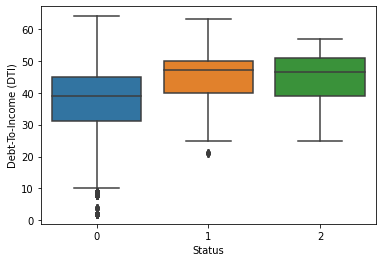

In [40]:
ax=sns.boxplot(x='Status',y='Debt-To-Income (DTI)',data=df)

<AxesSubplot:xlabel='Status', ylabel='Debt-To-Income (DTI)'>

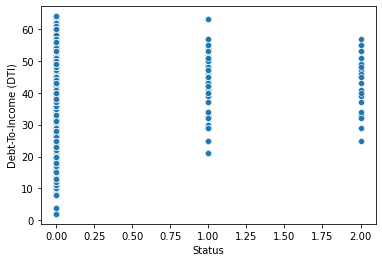

In [57]:
sns.scatterplot(data=df, x="Status", y="Debt-To-Income (DTI)")
#can be sure that when DTI is lower we get lower probability of default than in upper cases

<AxesSubplot:xlabel='Status', ylabel='Debt-To-Income (DTI)'>

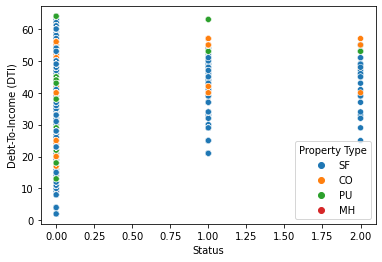

In [60]:
sns.scatterplot(data=df, x="Status", y="Debt-To-Income (DTI)",hue='Property Type')

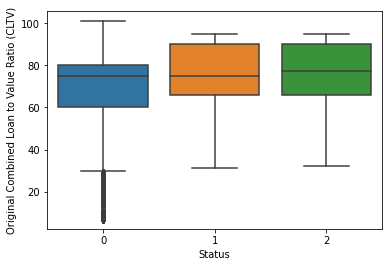

In [42]:
ax2=sns.boxplot(x='Status',y='Original Combined Loan to Value Ratio (CLTV)',data=df)
#higher delinquency in CLTV >80. 

<AxesSubplot:xlabel='Status', ylabel='Original Combined Loan to Value Ratio (CLTV)'>

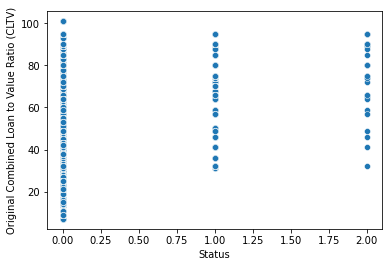

In [54]:
sns.scatterplot(data=df, x="Status", y="Original Combined Loan to Value Ratio (CLTV)")
#lower CLTV dont default

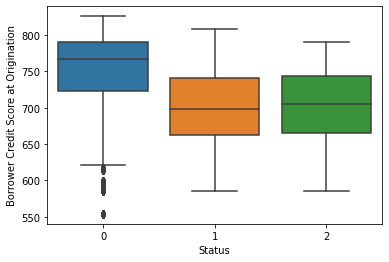

In [44]:
ax3=sns.boxplot(x='Status',y='Borrower Credit Score at Origination',data=df)
#higher FICO implies lower likelihood of delinquency, lower FICO median in delinquent accounts. Interestingly, the FICO on average of defined default loans is higher than those of delinquent

<AxesSubplot:xlabel='Status', ylabel='Borrower Credit Score at Origination'>

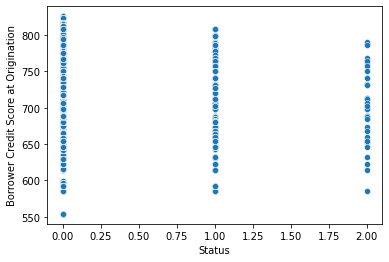

In [55]:
sns.scatterplot(data=df,x='Status',y='Borrower Credit Score at Origination')

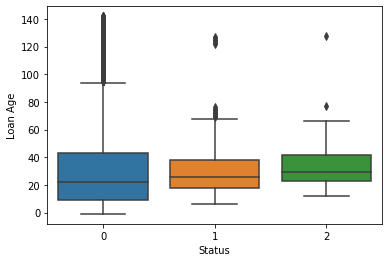

In [46]:
ax4=sns.boxplot(x='Status',y='Loan Age',data=df)
#marginally lower median age with longer age in current loans implying that the loans which default do so max by age 60-80.

<AxesSubplot:xlabel='Status', ylabel='Loan Age'>

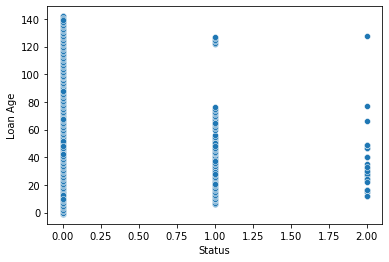

In [62]:
sns.scatterplot(data=df,x='Status',y='Loan Age')

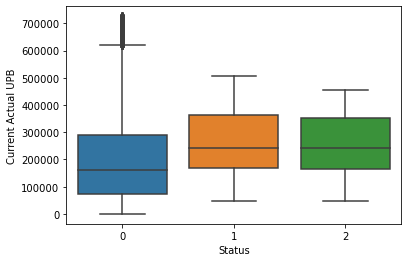

In [72]:
ax4=sns.boxplot(x='Status',y='Current Actual UPB',data=df)

<AxesSubplot:xlabel='Status', ylabel='Current Actual UPB'>

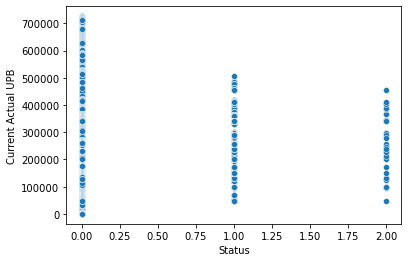

In [74]:
sns.scatterplot(data=df,x='Status',y='Current Actual UPB')

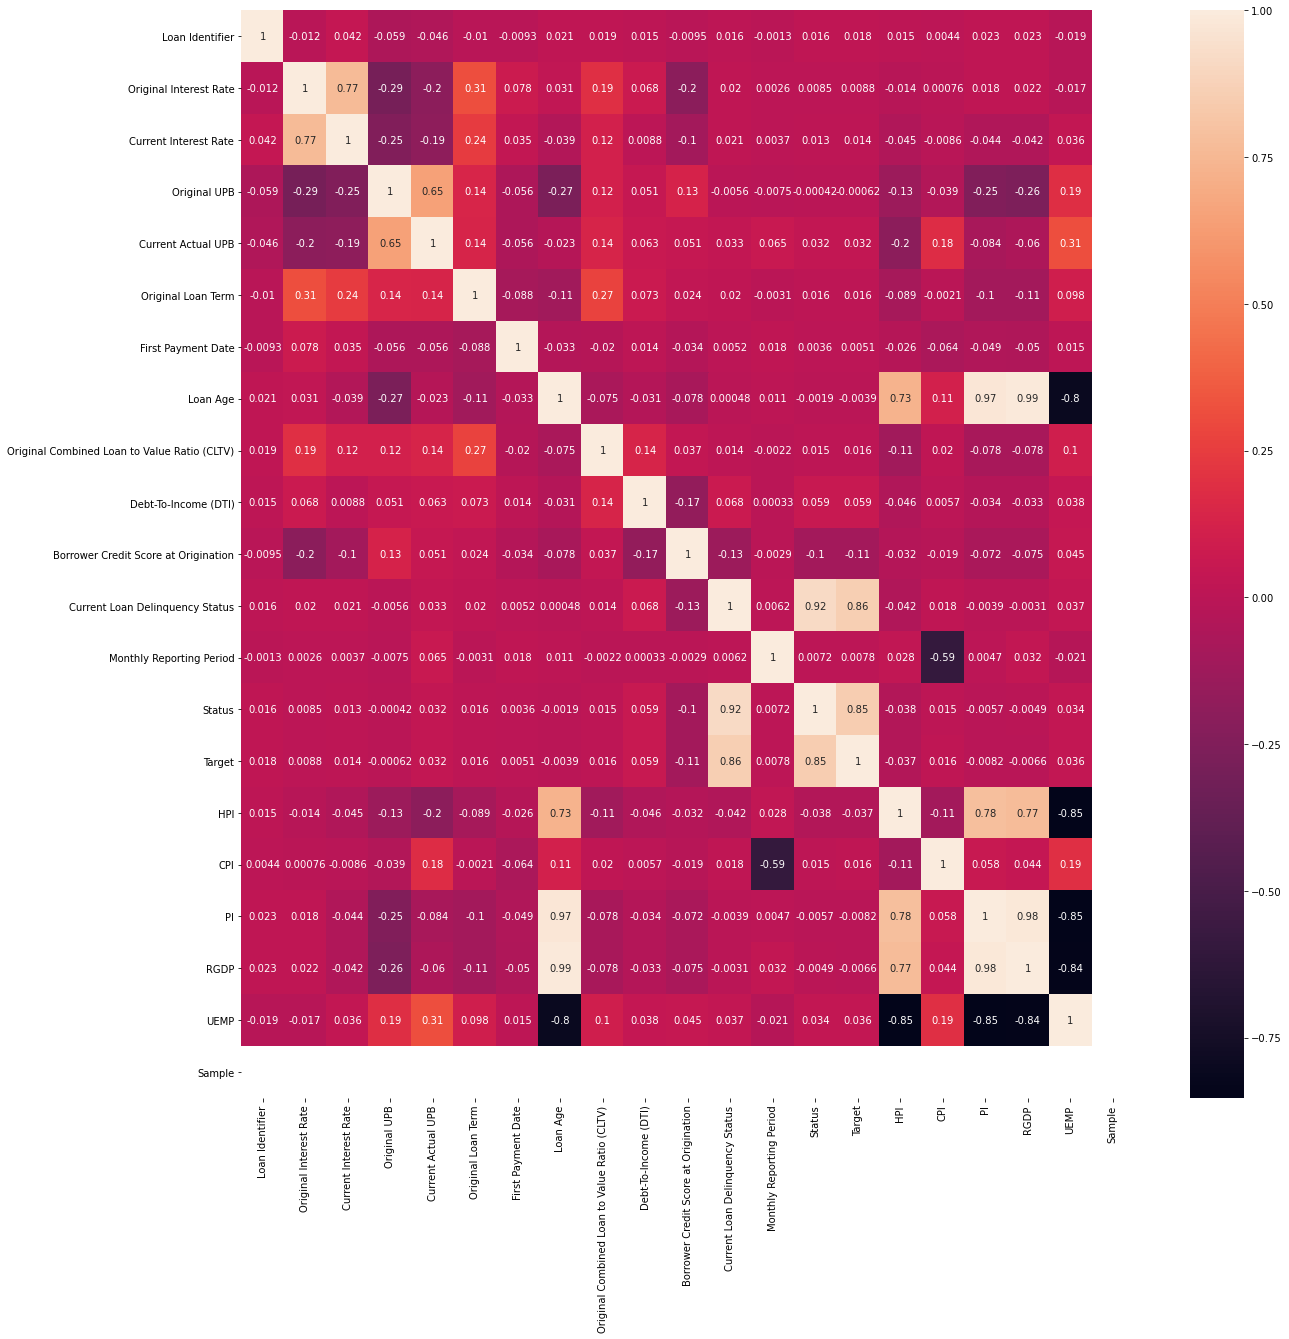

In [64]:
plt.figure(figsize=(20,20))
cor_max=df.corr()
sns.heatmap(cor_max,annot=True)
plt.show()

In [15]:
#drop RGDP/PI(which one to pick, take UEMP(use HPI to get CLTV)), UEMP/HPI,Status/CLDS,drop reporting period, Current UPB/Original UPB, Current Interest Rate and Original Interest rate

In [16]:
df2=df2.drop(['Amortization Type','Current Loan Delinquency Status','RGDP','HPI','Original Interest Rate','Original UPB'],axis=1)

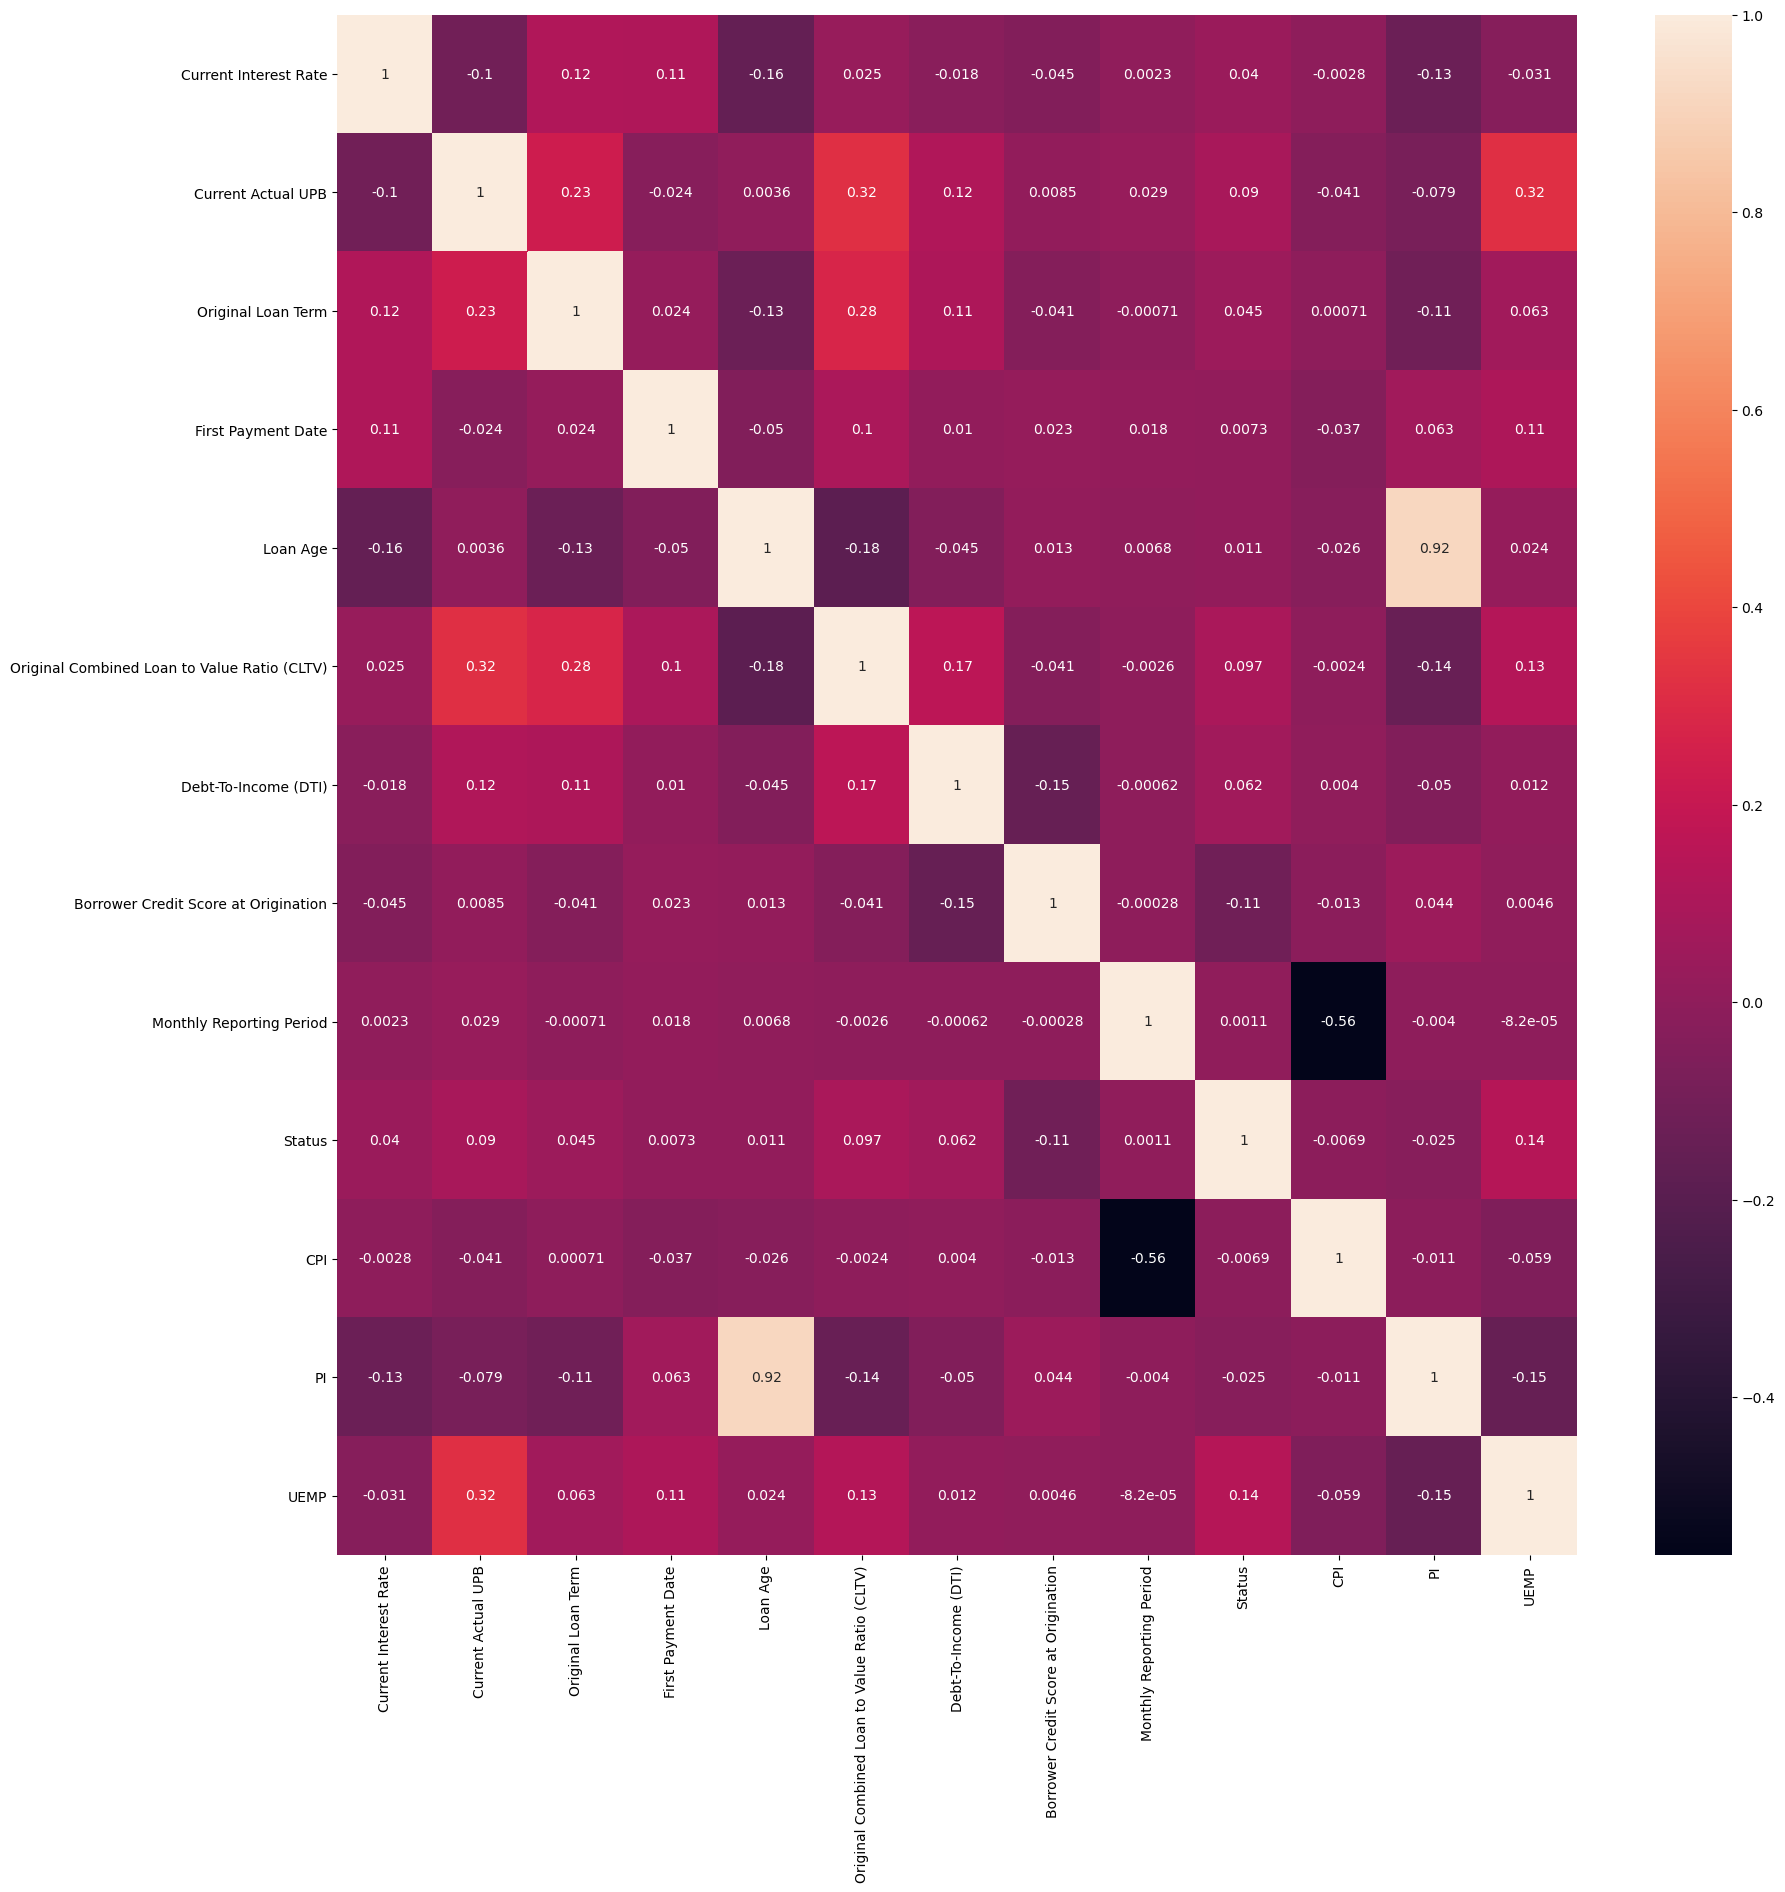

In [17]:
df2.head()
plt.figure(figsize=(20,20))
cor_max=df2.corr()
sns.heatmap(cor_max,annot=True)
plt.show()

In [18]:
df2=df2.drop('Loan Age',axis=1)

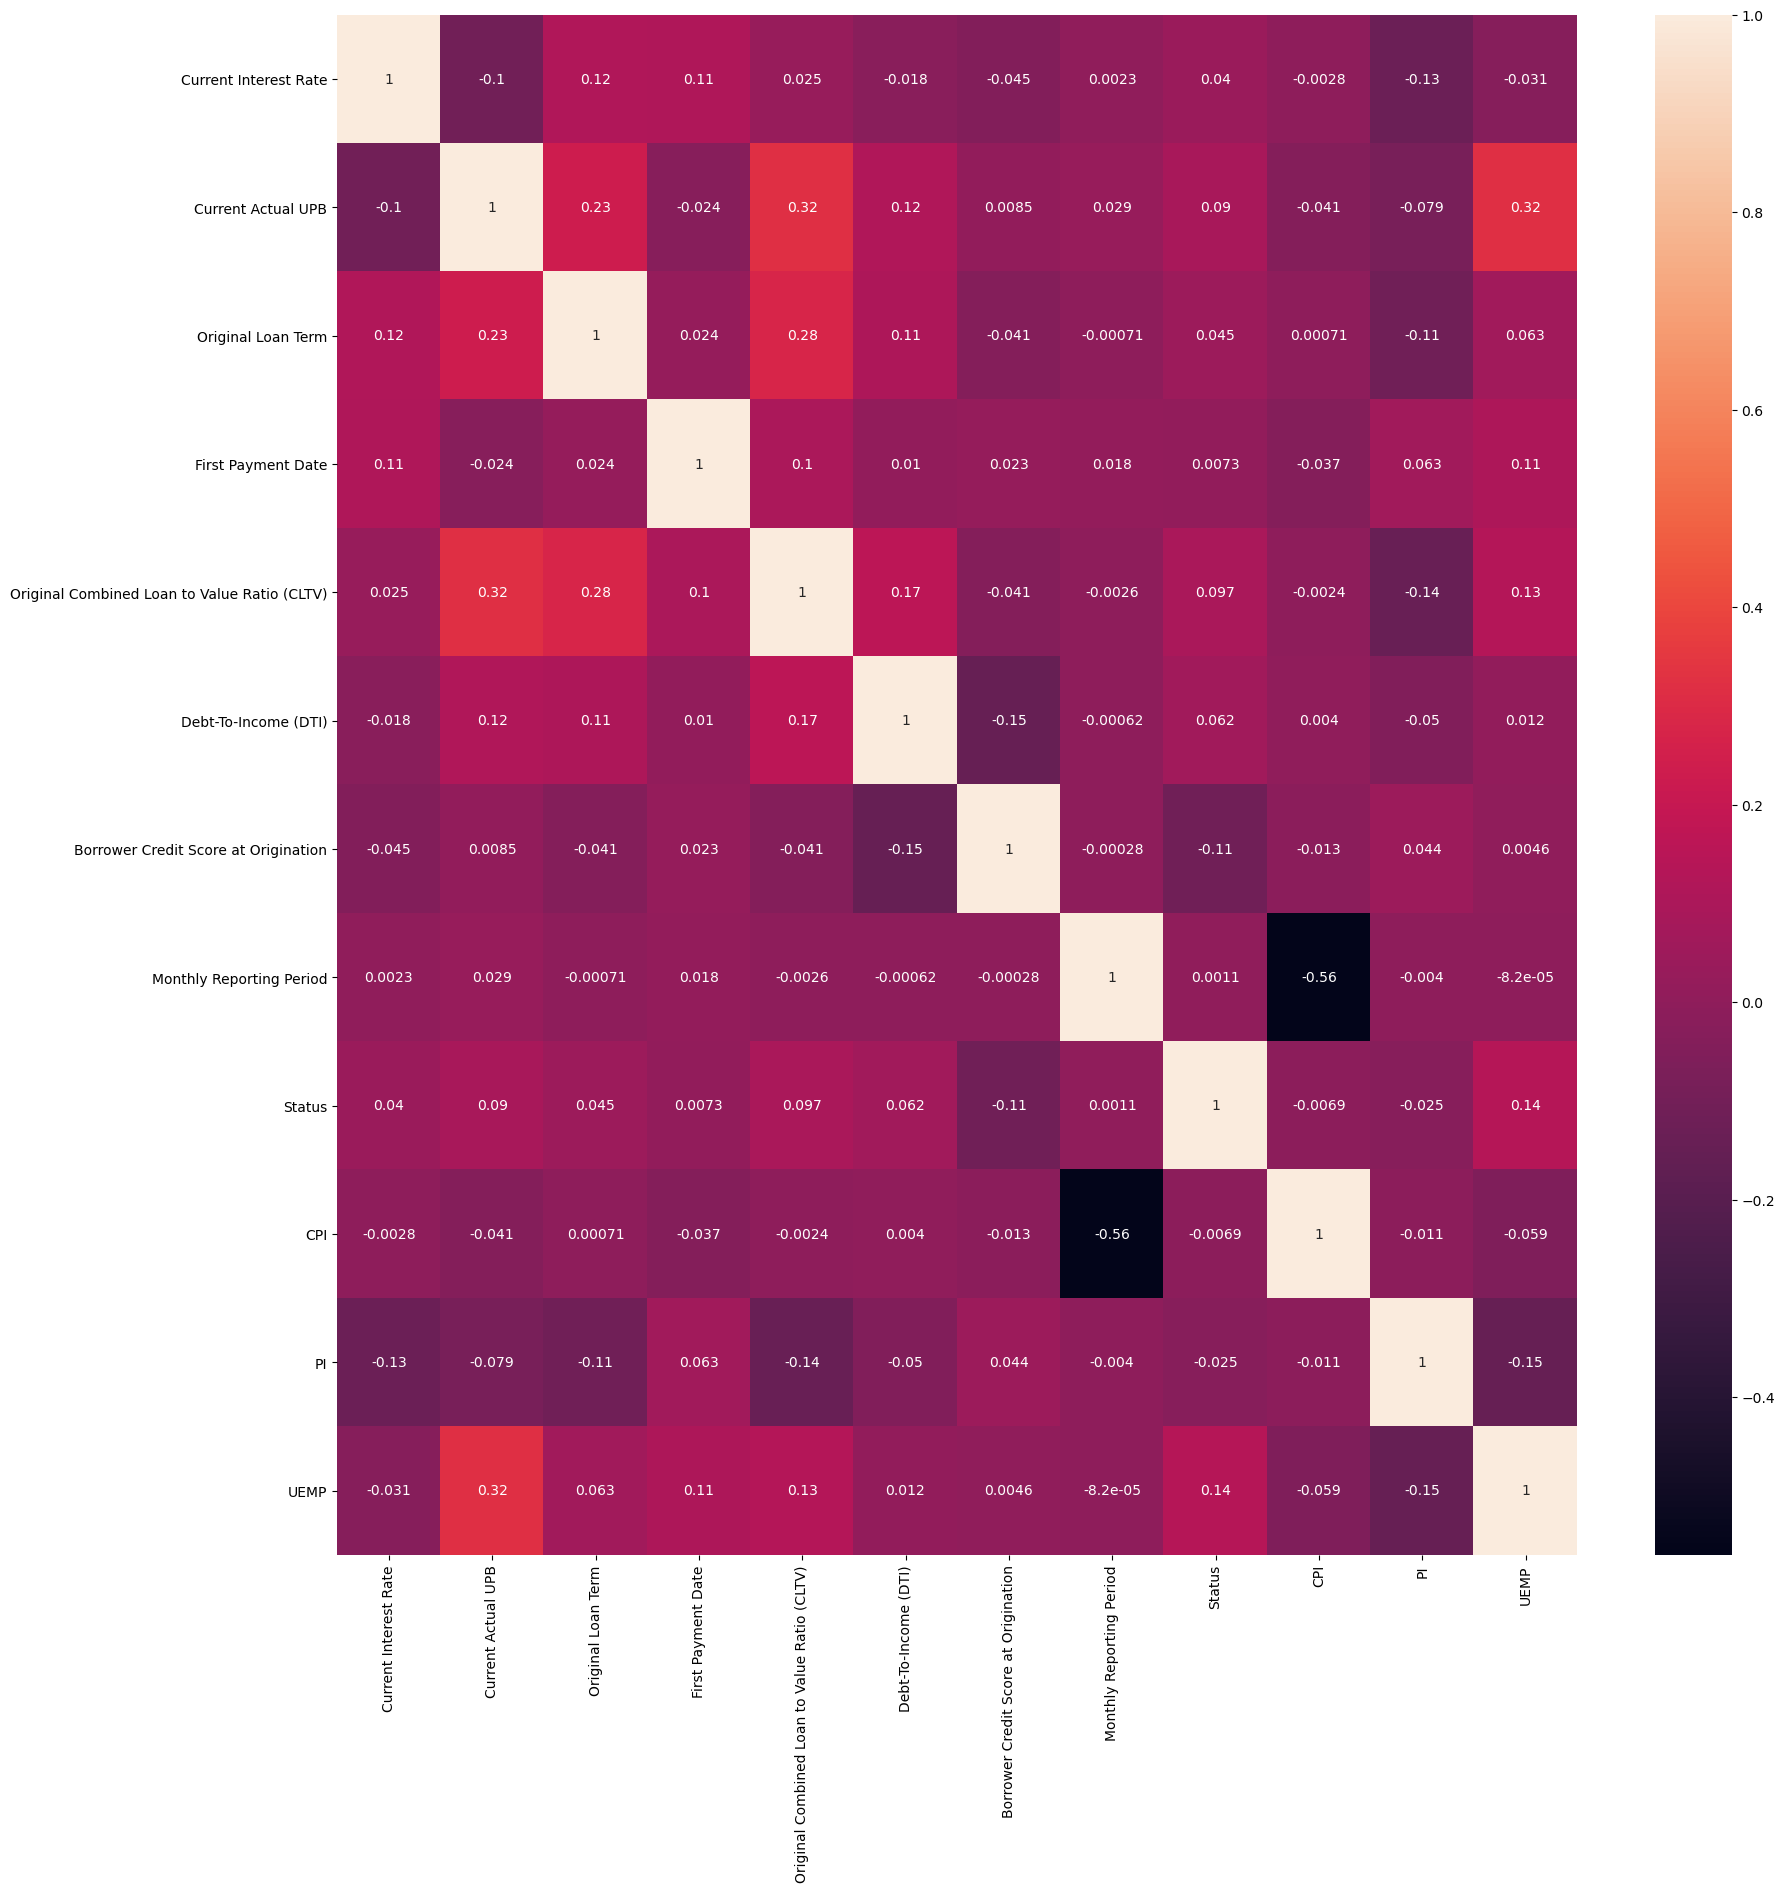

In [19]:
df2.head()
plt.figure(figsize=(20,20))
cor_max=df2.corr()
sns.heatmap(cor_max,annot=True)
plt.show()

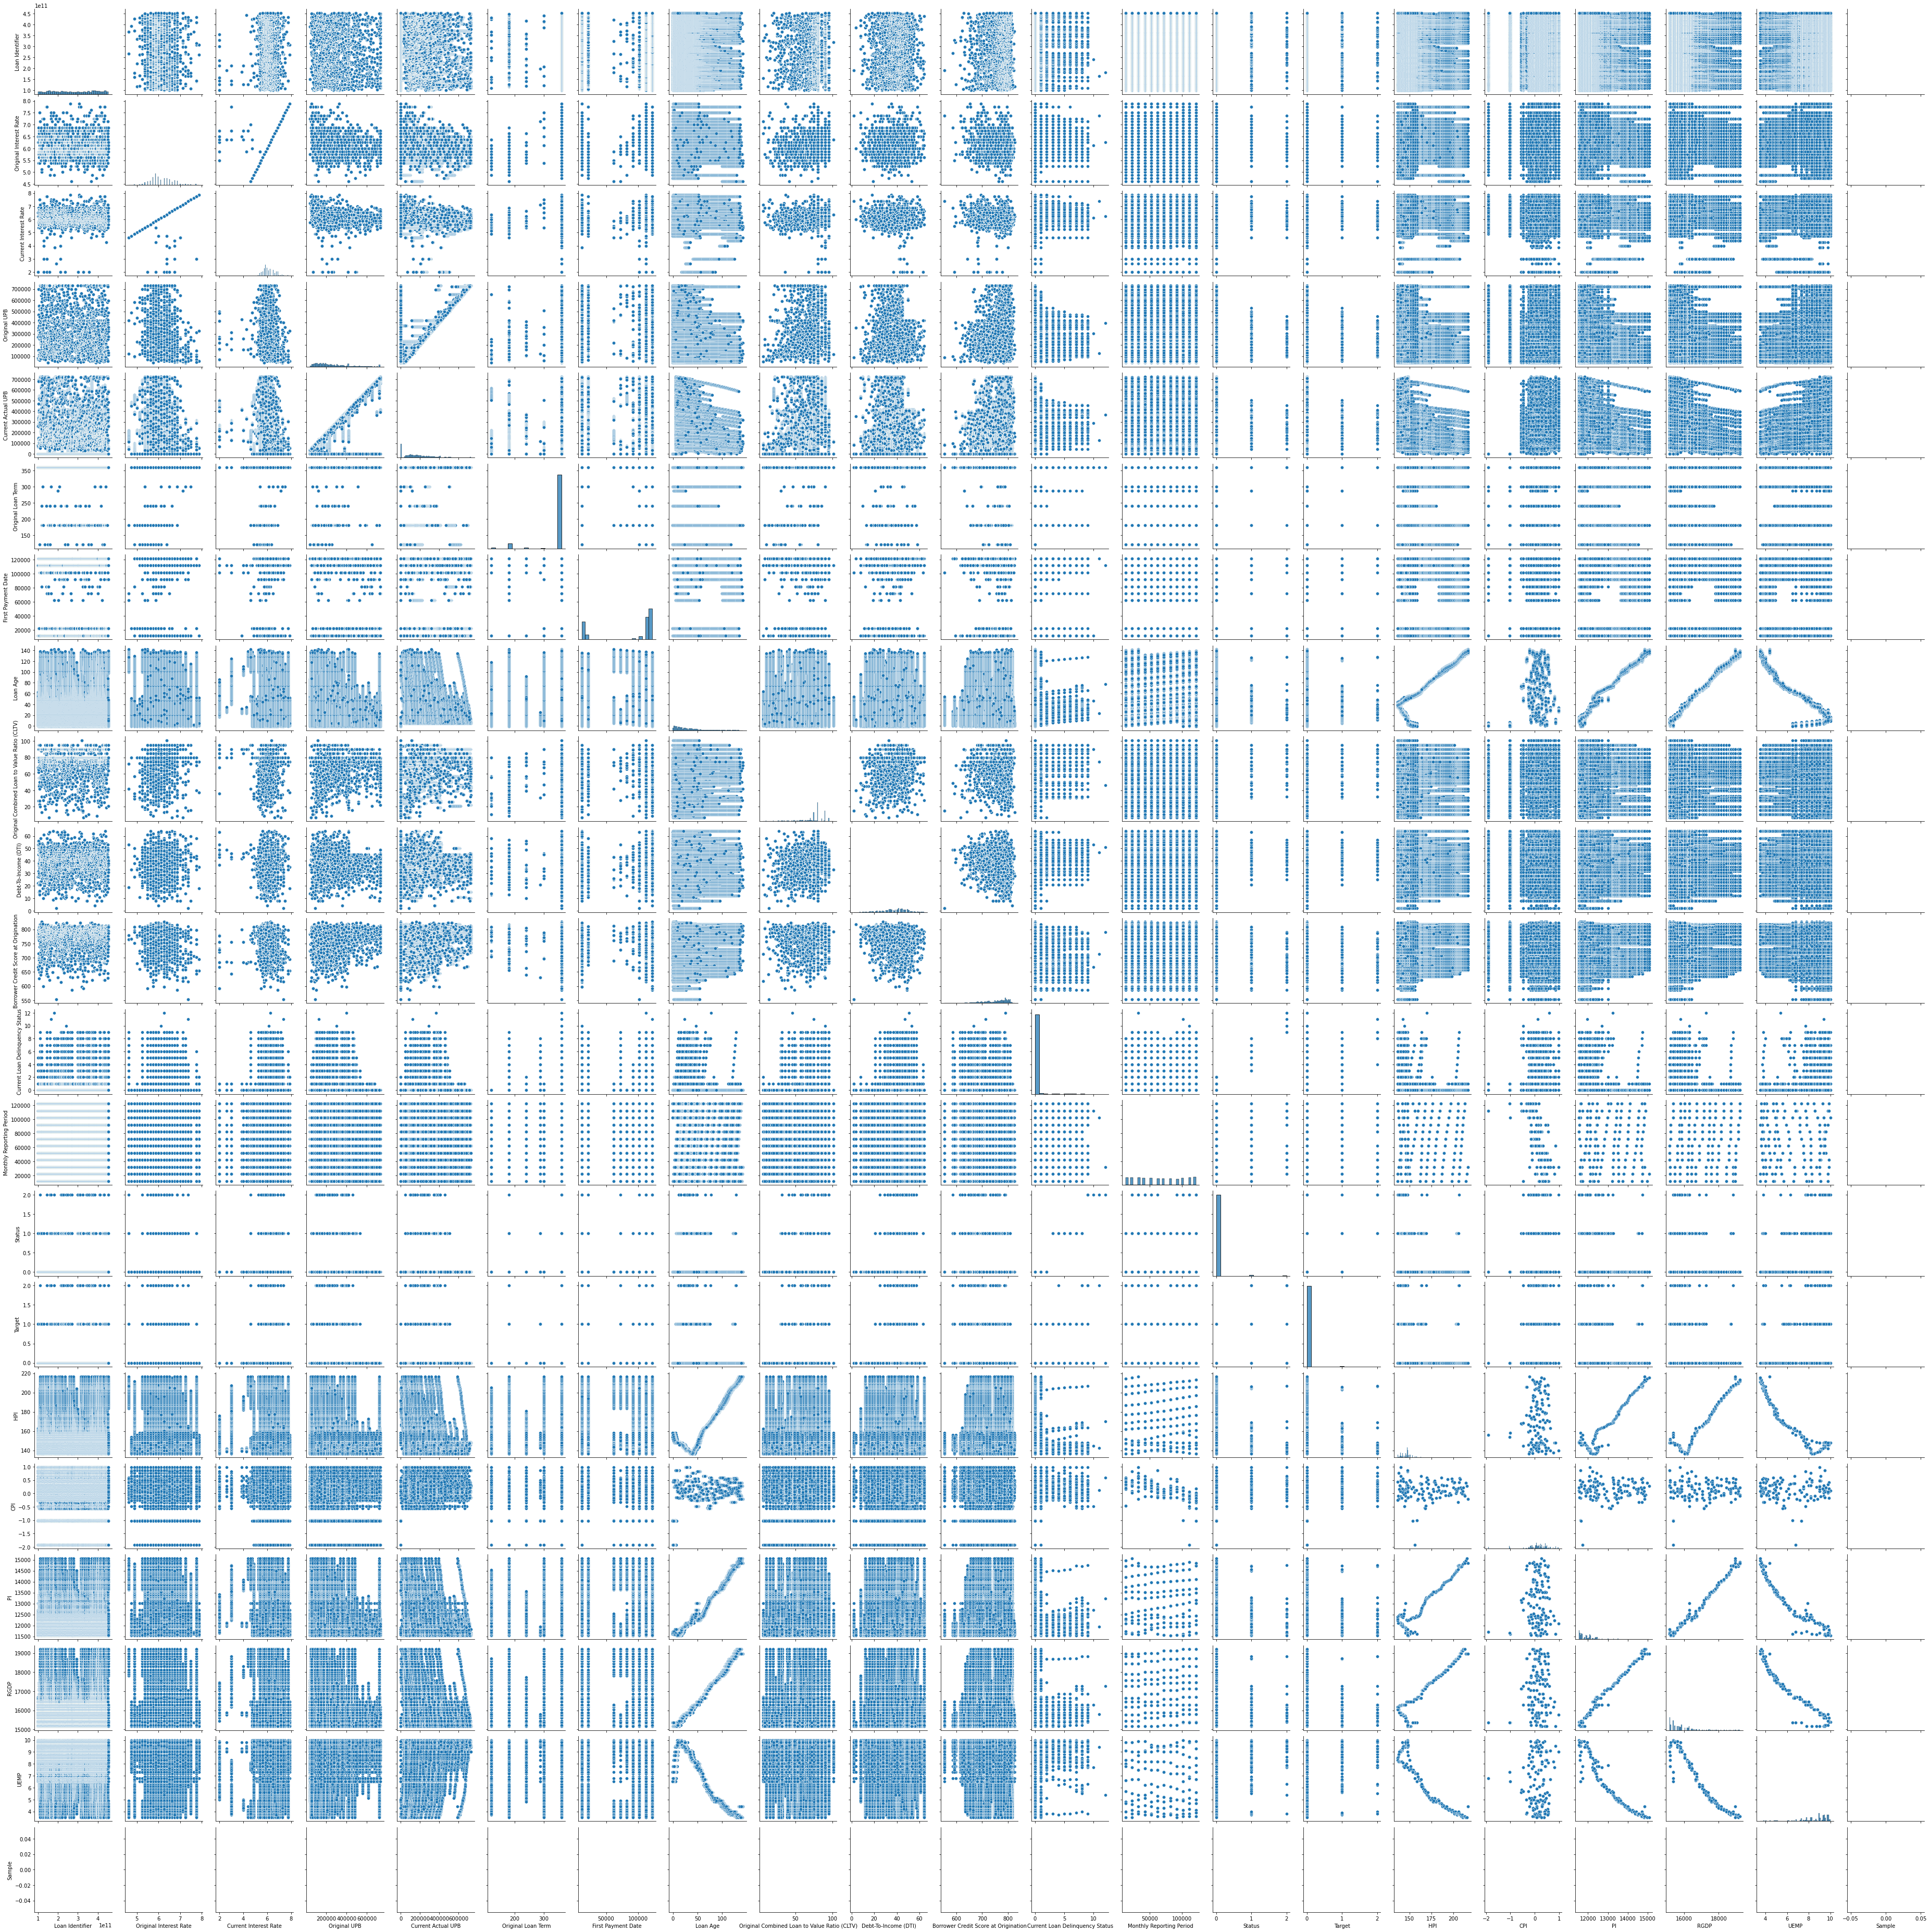

In [65]:
sns.pairplot(df)
plt.show()

In [66]:
df.head()

Loan Identifier  Original Interest Rate  Current Interest Rate  \
0     100077506572                    6.25                   6.25   
1     100077506572                    6.25                   6.25   
2     100077506572                    6.25                   6.25   
3     100077506572                    6.25                   6.25   
4     100077506572                    6.25                   6.25   

   Original UPB  Current Actual UPB  Original Loan Term  First Payment Date  \
0       74000.0                 0.0                 360              112008   
1       74000.0                 0.0                 360              112008   
2       74000.0                 0.0                 360              112008   
3       74000.0                 0.0                 360              112008   
4       74000.0                 0.0                 360              112008   

   Loan Age  Original Combined Loan to Value Ratio (CLTV)  \
0       0.0                                          80.0   
1       1.0                                          80.0   
2       2.0                                          80.0   
3       3.0                                          80.0   
4       4.0                                          80.0   

   Debt-To-Income (DTI)  ...  Current Loan Delinquency Status  \
0                  22.0  ...                                0   
1                  22.0  ...                                0   
2                  22.0  ...                                0   
3                  22.0  ...                                0   
4                  22.0  ...                                0   

  Monthly Reporting Period Status Target      HPI       CPI       PI  \
0                   102008      0      0  158.331 -1.010133  11616.7   
1                   112008      0      0  156.144 -1.915290  11713.8   
2                   122008      0      0  153.618 -1.034247  11655.4   
3                    12009      0      0  151.505  0.435242  11718.0   
4                    22009      0      0  150.012  0.497293  11598.7   

        RGDP  UEMP  Sample  
0  15366.607   6.5     NaN  
1  15366.607   6.8     NaN  
2  15366.607   7.3     NaN  
3  15187.475   7.8     NaN  
4  15187.475   8.3     NaN  

[5 rows x 24 columns]

<AxesSubplot:xlabel='Borrower Credit Score at Origination', ylabel='Count'>

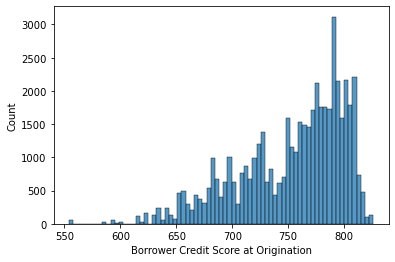

In [68]:
sns.histplot(data=df,x='Borrower Credit Score at Origination')

<AxesSubplot:xlabel='Debt-To-Income (DTI)', ylabel='Count'>

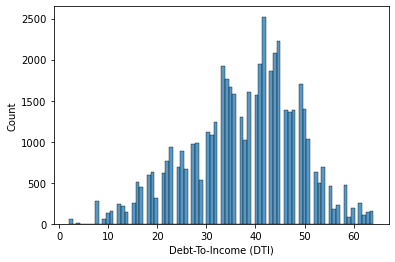

In [69]:
sns.histplot(data=df,x='Debt-To-Income (DTI)')

<AxesSubplot:xlabel='Original Combined Loan to Value Ratio (CLTV)', ylabel='Count'>

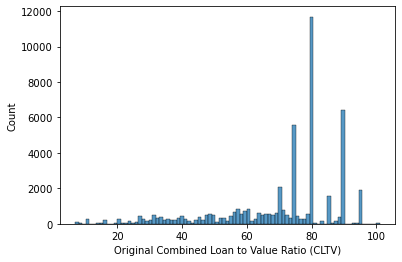

In [70]:
sns.histplot(data=df,x='Original Combined Loan to Value Ratio (CLTV)')

<AxesSubplot:xlabel='Loan Age', ylabel='Count'>

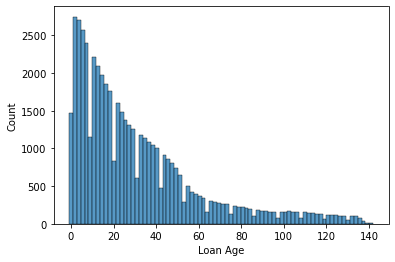

In [71]:
sns.histplot(data=df,x='Loan Age')

<AxesSubplot:xlabel='Current Actual UPB', ylabel='Count'>

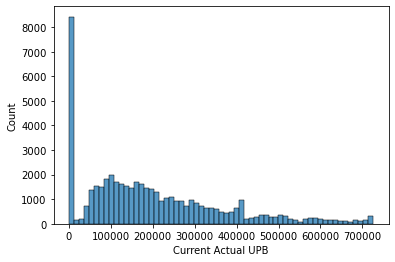

In [75]:
sns.histplot(data=df,x='Current Actual UPB')
#Why this peak on the left, it is also ruining LGD projections in other projects?

In [81]:
#get categorical features
cols=df.columns
num_cols=df._get_numeric_data().columns
list(set(cols)-set(num_cols))

['Loan Purpose ', 'Property Type', 'Amortization Type']

In [83]:
df['Loan Purpose '].unique()

array(['P', 'C', 'R'], dtype=object)

In [84]:
df['Property Type'].unique()

array(['SF', 'CO', 'PU', 'MH'], dtype=object)

In [85]:
df['Amortization Type'].unique()
#not very unique, so we encode two vars, zero balance is possible, but why

array(['FRM'], dtype=object)

In [90]:
encoded_df=pd.get_dummies(df,columns=['Loan Purpose ','Property Type'])

In [91]:
encoded_df.head()

Loan Identifier  Original Interest Rate  Current Interest Rate  \
0     100077506572                    6.25                   6.25   
1     100077506572                    6.25                   6.25   
2     100077506572                    6.25                   6.25   
3     100077506572                    6.25                   6.25   
4     100077506572                    6.25                   6.25   

   Original UPB  Current Actual UPB  Original Loan Term  First Payment Date  \
0       74000.0                 0.0                 360              112008   
1       74000.0                 0.0                 360              112008   
2       74000.0                 0.0                 360              112008   
3       74000.0                 0.0                 360              112008   
4       74000.0                 0.0                 360              112008   

   Loan Age  Original Combined Loan to Value Ratio (CLTV)  \
0       0.0                                          80.0   
1       1.0                                          80.0   
2       2.0                                          80.0   
3       3.0                                          80.0   
4       4.0                                          80.0   

   Debt-To-Income (DTI)  ...       RGDP UEMP  Sample  Loan Purpose _C  \
0                  22.0  ...  15366.607  6.5     NaN                0   
1                  22.0  ...  15366.607  6.8     NaN                0   
2                  22.0  ...  15366.607  7.3     NaN                0   
3                  22.0  ...  15187.475  7.8     NaN                0   
4                  22.0  ...  15187.475  8.3     NaN                0   

   Loan Purpose _P  Loan Purpose _R  Property Type_CO  Property Type_MH  \
0                1                0                 0                 0   
1                1                0                 0                 0   
2                1                0                 0                 0   
3                1                0                 0                 0   
4                1                0                 0                 0   

   Property Type_PU  Property Type_SF  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 29 columns]